In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('C://Users//ghorb//OneDrive//Bureau//heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
sains = df.loc[df['HeartDiseaseorAttack'] ==0.0] 
malade= df.loc[df['HeartDiseaseorAttack'] ==1.0] 
print(sains)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253674                   0.0     0.0       0.0        1.0  27.0     0.0   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0     

In [5]:
print('sains ', len(sains),
      ' transactions or ',
      round(df['HeartDiseaseorAttack'].value_counts()[0.0]/len(df)*100,2), '% of the dataset')

sains  229787  transactions or  90.58 % of the dataset


In [6]:
print('malade ', len(malade),
      ' transactions or ', 
      round(df['HeartDiseaseorAttack'].value_counts()[1.0]/len(df)*100,2), '% of the dataset')

malade  23893  transactions or  9.42 % of the dataset


In [7]:
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

Seulement 23893 des patients sont malades . Cela signifie que l'ensemble de données est assez déséquilibré ; 90.58 % des patients sont normales. Les cas de maladie sont des anomalies et donc notre modèle effectuera une détection d'anomalies pour découvrir quelles patients  sont malades

Nous ne voulons pas utiliser cette base de données comme base pour nos modèles prédictifs et nos analyses, car nous obtiendrons beaucoup d'erreurs et notre modèle surapprentissage
 car il supposera que la plupart des patients  ne sont pas malades. Cela nous obligera à modifier le cadre de données un peu plus tard afin que nous puissions créer un modèle qui prédit correctement les (modèles) les patients malades.

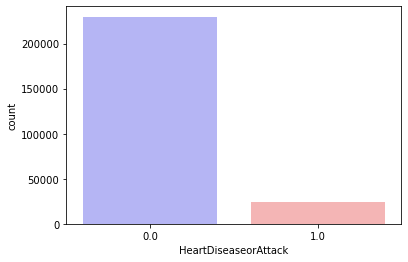

In [8]:
sns.countplot(x="HeartDiseaseorAttack", data=df, palette="bwr")
plt.show()


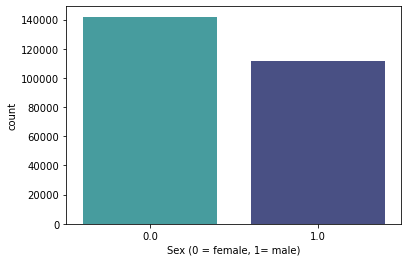

In [9]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [10]:
female = df.loc[df['Sex'] ==0.0] 
male= df.loc[df['Sex'] ==1.0] 
print('female ', len(female),
      ' transactions or ',
      round(df['Sex'].value_counts()[0.0]/len(df)*100,2), '% of the dataset')
print('male ', len(male),
      ' transactions or ', 
      round(df['Sex'].value_counts()[1.0]/len(df)*100,2), '% of the dataset')

female  141974  transactions or  55.97 % of the dataset
male  111706  transactions or  44.03 % of the dataset


In [11]:
df.groupby('HeartDiseaseorAttack').mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,,,,,,,,,,,,,,,,,,,,,
0.0,0.395588,0.395314,0.959967,28.269624,0.424837,0.027656,0.256337,0.768625,0.637329,0.816360,...,0.949749,0.081401,2.422369,3.030306,3.731299,0.142567,0.426560,7.813858,5.082093,6.148050
1.0,0.750345,0.701168,0.988658,29.466622,0.619470,0.164776,0.687231,0.640355,0.604696,0.763906,...,0.963588,0.110869,3.367555,4.670322,9.154439,0.414975,0.572887,10.131210,4.745951,5.148161


A crosstab is a table showing the relationship between two or more variables. Where the table only shows the relationship between two categorical variables

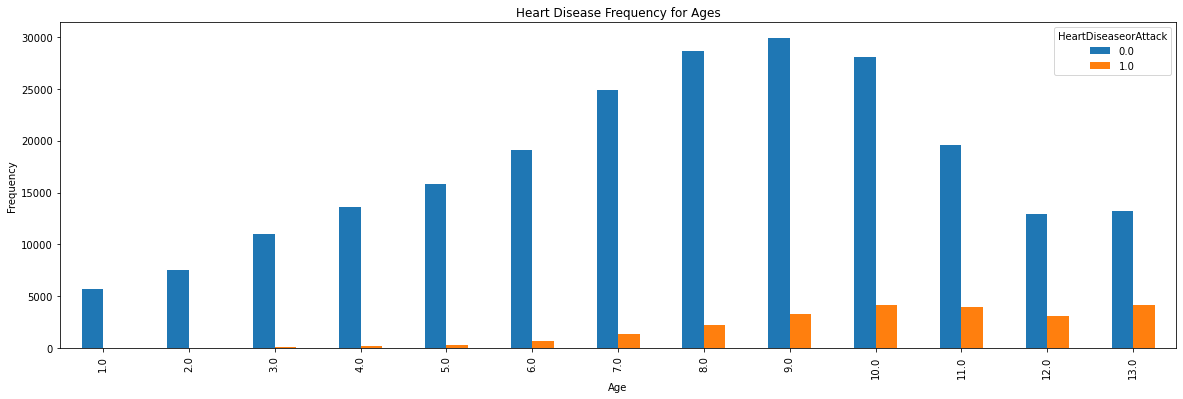

In [12]:
pd.crosstab(df.Age,df.HeartDiseaseorAttack).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


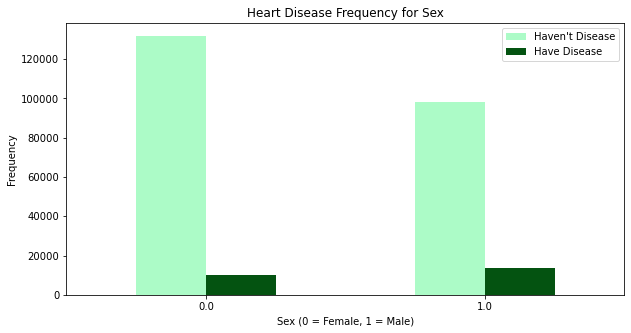

In [13]:
pd.crosstab(df.Sex,df.HeartDiseaseorAttack).plot(kind="bar",figsize=(10,5),color=['#acfbc7','#045311' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

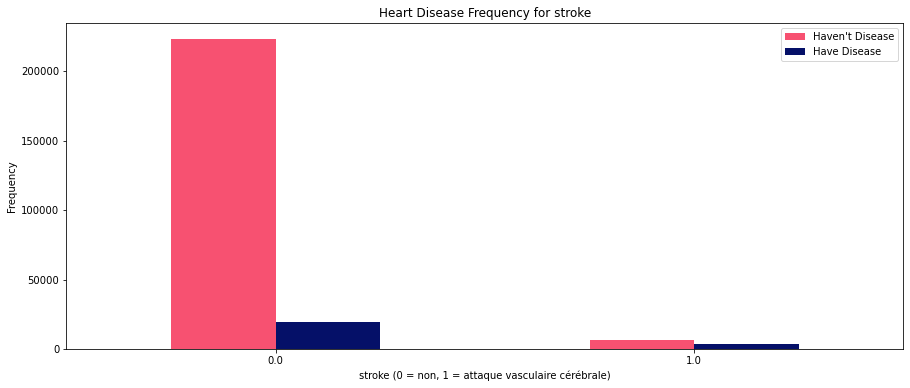

In [14]:
pd.crosstab(df.Stroke,df.HeartDiseaseorAttack).plot(kind="bar",figsize=(15,6),color=['#f75171','#051068' ])
plt.title('Heart Disease Frequency for stroke')
plt.xlabel('stroke (0 = non, 1 = attaque vasculaire cérébrale)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

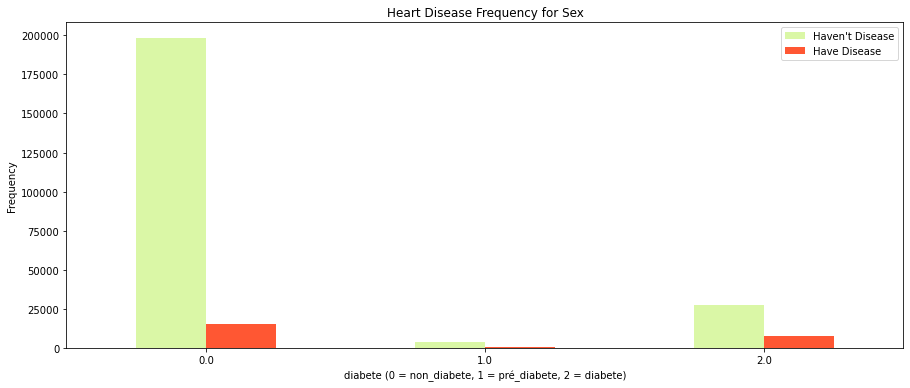

In [15]:
pd.crosstab(df.Diabetes,df.HeartDiseaseorAttack).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('diabete (0 = non_diabete, 1 = pré_diabete, 2 = diabete)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

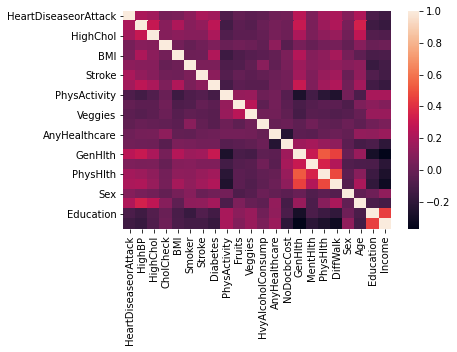

In [16]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()

In [17]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']


In [18]:
pip install imblearn

# Over_sampling


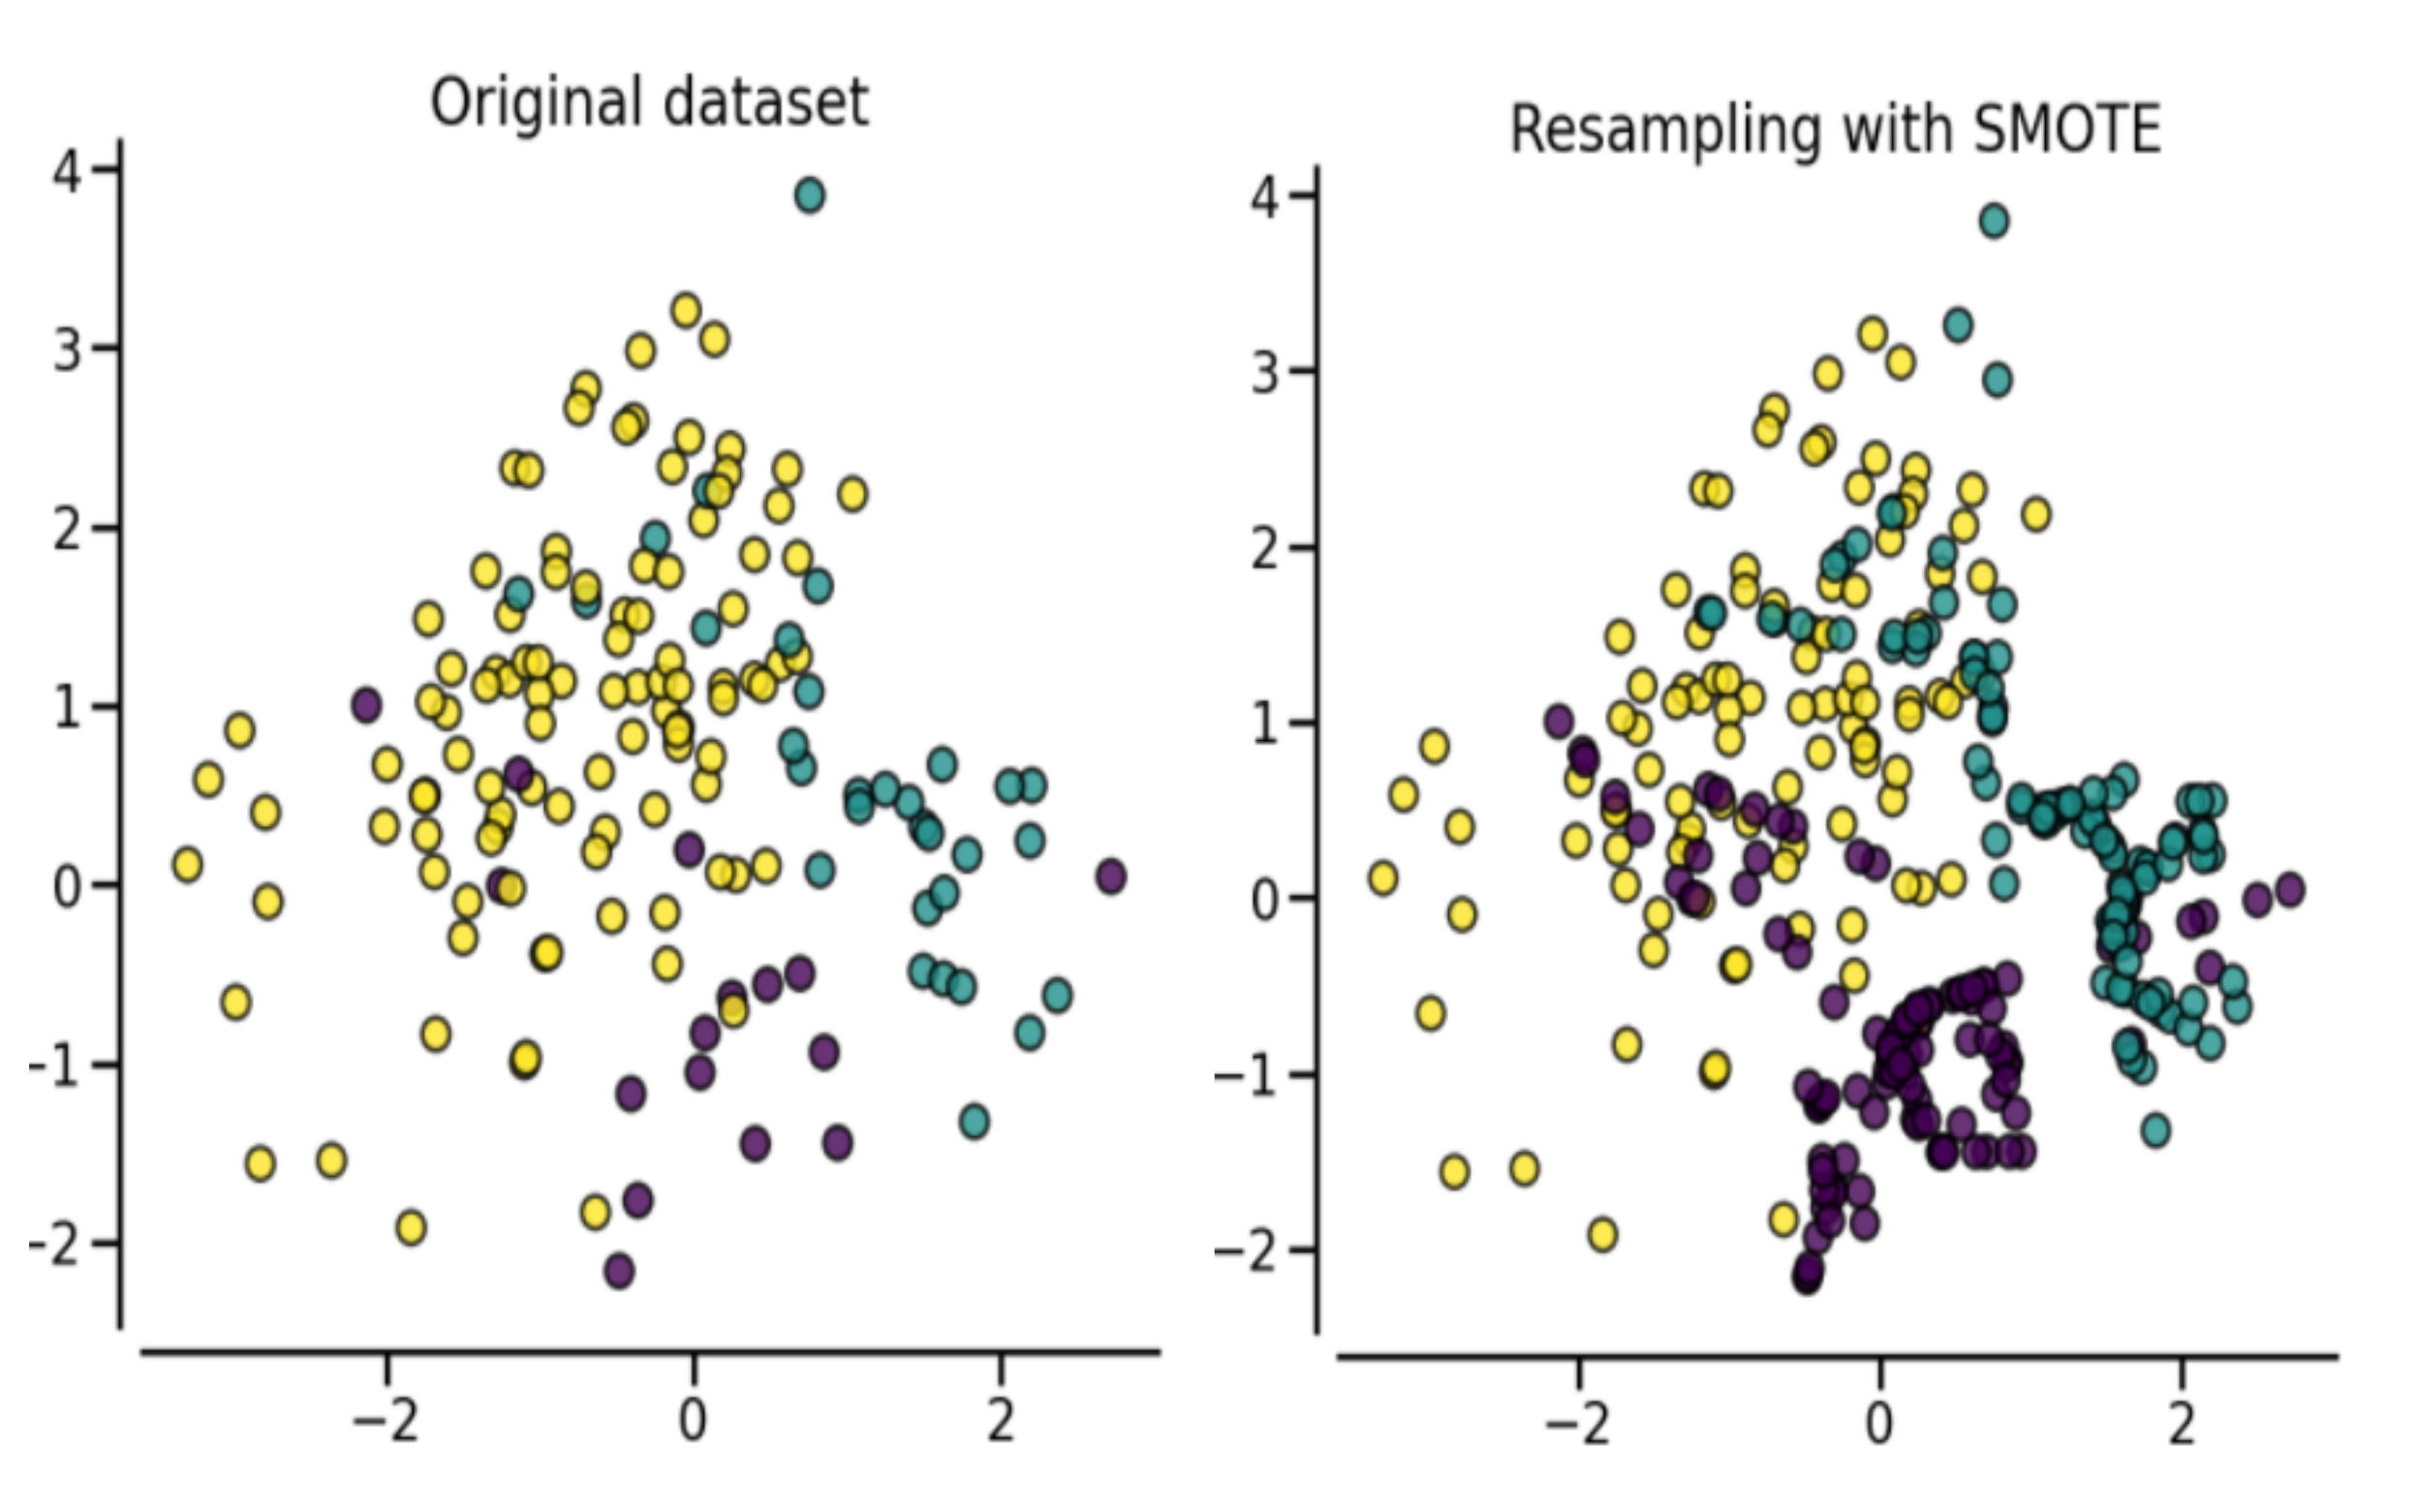

In [19]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)
resampleddf=X_resampled
resampleddf["HeartDiseaseorAttack"]=y_resampled


Train set: (367659, 21)
Test set: (91915, 21)


In [20]:
resampleddf.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


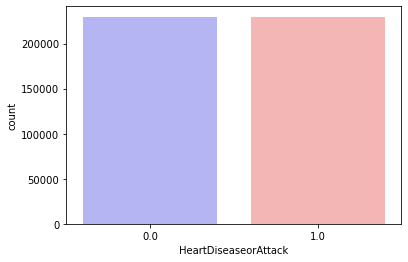

In [21]:
sns.countplot(x="HeartDiseaseorAttack", data=resampleddf, palette="bwr")
plt.show()


# linearSVC

In [22]:
from sklearn.svm import LinearSVC
clf_smote = LinearSVC().fit(X_train, y_train)

In [23]:
y_pred=clf_smote.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

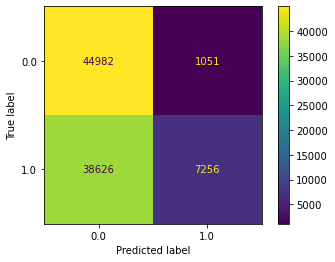

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
con=confusion_matrix(y_test,p_boost)
plot_confusion_matrix(clf_smote, X_test, y_test) 
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.54      0.69     83608
         1.0       0.16      0.87      0.27      8307

    accuracy                           0.57     91915
   macro avg       0.57      0.71      0.48     91915
weighted avg       0.90      0.57      0.66     91915



# Modéle XGBOOT 

## comparaison entre bagging ( random forest) et boosting (xgboot)


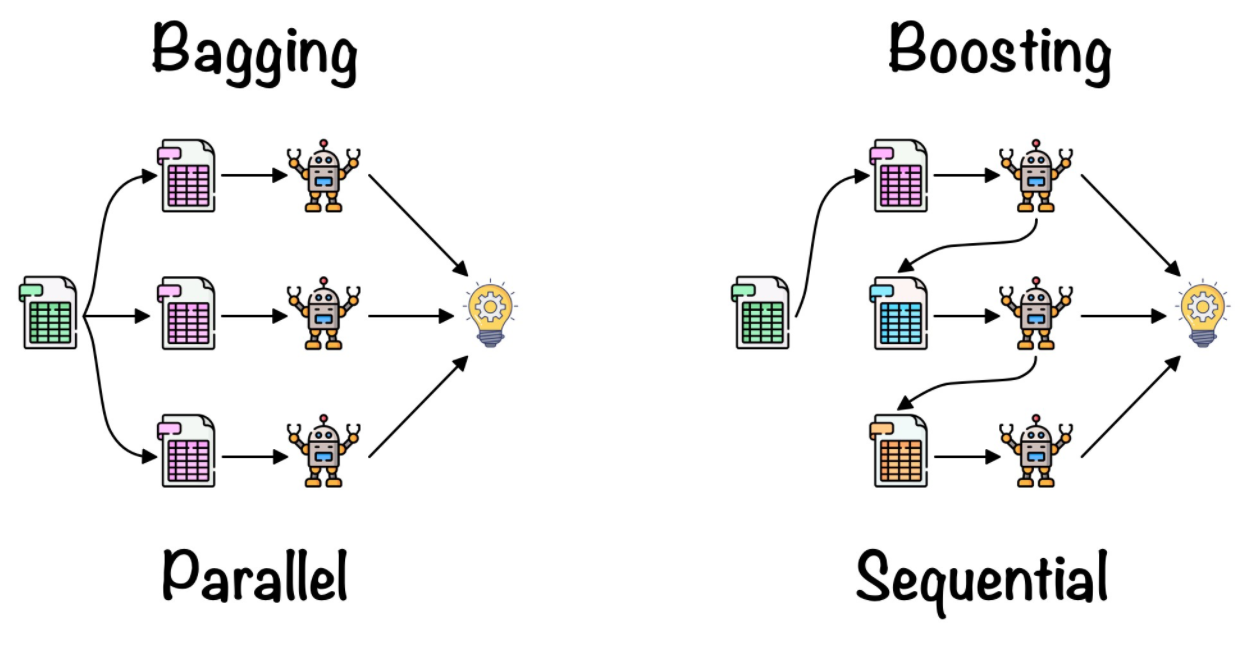

In [32]:
from xgboost import XGBClassifier
boost = XGBClassifier()
boost.fit(X_train, y_train)
p_boost = boost.predict(X_test)
print ("Score Train -->", round(boost.score(X_train, y_train) *100,2), " %")

[15:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score Train --> 94.92  %


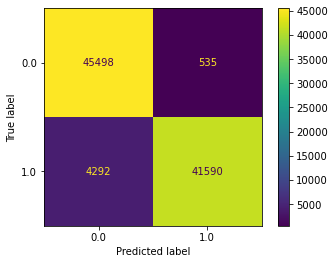

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
con=confusion_matrix(y_test,p_boost)
plot_confusion_matrix(boost, X_test, y_test) 
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(p_boost,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     49790
         1.0       0.91      0.99      0.95     42125

    accuracy                           0.95     91915
   macro avg       0.95      0.95      0.95     91915
weighted avg       0.95      0.95      0.95     91915



In [40]:
xgboost_score = cross_val_score(boost, X_train, y_train, cv=5)
print('XGBoost Cross Validation Score: ', 
      round(xgboost_score.mean() * 100, 2).astype(str) + '%')

[16:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [30]:
import xgboost as xgb
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5
 
clf = xgb.XGBClassifier(param)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

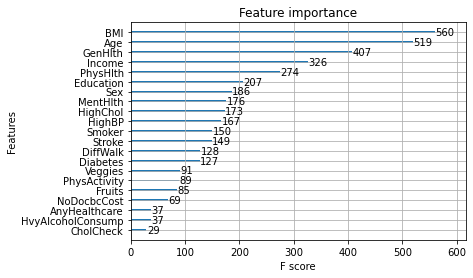

In [31]:
xgb.plot_importance(boost)